# Compras públicas

Por Jaime López  
Abril 2019

En este notebook se hace un análisis del dataset de procesos de compra registrados en [Comprasal](https://www.comprasal.gob.sv) durante el año 2018. The dataset was given by Ministerio de Hacienda attending request from Fundación Nacional para el Desarrollo.

In [147]:
# Loading libraries
import pandas as pd
import matplotlib.pyplot as plt

## Data exploration

In this section the dataset is loaded in memory, exploring some general characteristics about it.

In [148]:
data = pd.read_excel('Base_de_datos_de_Comprasal-proporcionado_por_MH.xls')

In [149]:
# Getting attribute names
data.columns

Index(['Institucion', 'Tipo de Proceso', 'Codigo Proceso', 'Nombre de Proceso',
       'Resultado', 'Monto', 'Nombre Proveedor', 'Fecha Resultado'],
      dtype='object')

In [150]:
# Dataset dimensions
data.shape

(71128, 8)

In [151]:
# Looking the first observations
data.head()

,Institucion,Tipo de Proceso,Codigo Proceso,Nombre de Proceso,Resultado,Monto,Nombre Proveedor,Fecha Resultado
0,Academia Nacional de Seguridad Pública,Contratación Directa (CD),CD-01/2019-ANSP,SERVICIO DE MANTENIMIENTO PREVENTIVO Y CORRECT...,Adjudicada,6000.00,"E- BUSINESS DISTRIBUTION DE EL SALVADOR, S.A. ...",2019-02-13 00:00:00
1,Academia Nacional de Seguridad Pública,Contratación Directa (CD),CD-02/2019-ANSP,MANTENIMIENTO PREVENTIVO CORRECTIVO DE PLANTA ...,Adjudicada,5766.34,"FASOR, S. A. DE C. V.",2019-01-31 00:00:00
2,Academia Nacional de Seguridad Pública,Contratación Directa (CD),CD-03/2018-ANSP,"SERVICIO DE SOPORTE PARA SOFTWARE ORACLE, DURA...",Adjudicada,13953.95,"DATUM, S.A. DE C.V.",2018-09-19 00:00:00
3,Academia Nacional de Seguridad Pública,Libre Gestion,LG-0159-2018,SUMINISTRO DE CARTONES PARA FIJAR SILUETAS,Oferta Seleccionada,3060.00,"IMPRENTA LA TARJETA, S. A. DE C. V.",2018-04-23 00:00:00
4,Academia Nacional de Seguridad Pública,Libre Gestion,LG-0160-2018,SUMINISTRO DE PLACAS Y MEDALLAS PARA GRADUACIO...,Cierre del Proceso sin Seleccion,0.00,NaN,2018-04-04 00:00:00


## Procurements by type of process

In [152]:
def normalize_name(name):
    ret = name
    pos1 = name.find('(')
    if pos1 > 0:
        ret = name[:pos1].strip()
    pos2 = name.find('-')
    if pos2 > 0:
        ret = ret[:pos2].strip()
    if ret == 'Licitacion Publica Internacional':
        ret = 'Licitación Pública Internacional'
    if ret.find('Licitación') >= 0:
        ret = 'Licitación'
    if ret.find('Concurso') >= 0:
        ret = 'Concurso'
    return ret

In [153]:
def successful_process(process):
    process = str(process)
    if process.find('Adjudic') >= 0:
        return True
    if process == 'Oferta Seleccionada':
        return True
    if process.find('Formaliz') >= 0:
        return True
    return False

In [154]:
data['Tipo de Proc.'] = data['Tipo de Proceso'].apply(normalize_name)
awarded = data[data.Resultado.apply(successful_process)]
by_process = awarded.groupby(['Tipo de Proc.']).sum().sort_values('Monto', ascending=False) / 1e6
by_process = by_process[by_process.Monto > 0]
by_process

,Monto
Tipo de Proc.,
Licitación,384.692919
Libre Gestion,115.075753
Contratación Directa,87.694427
Aviso de Expresiones de Interes,31.101915
Comparación de Precios,2.598854
Concurso,2.071413
Consultor Individual,0.470892
Calidad y Costo,0.220000
Convenio Interinstitucional,0.030000


Text(0, 0.5, 'USD Millones')

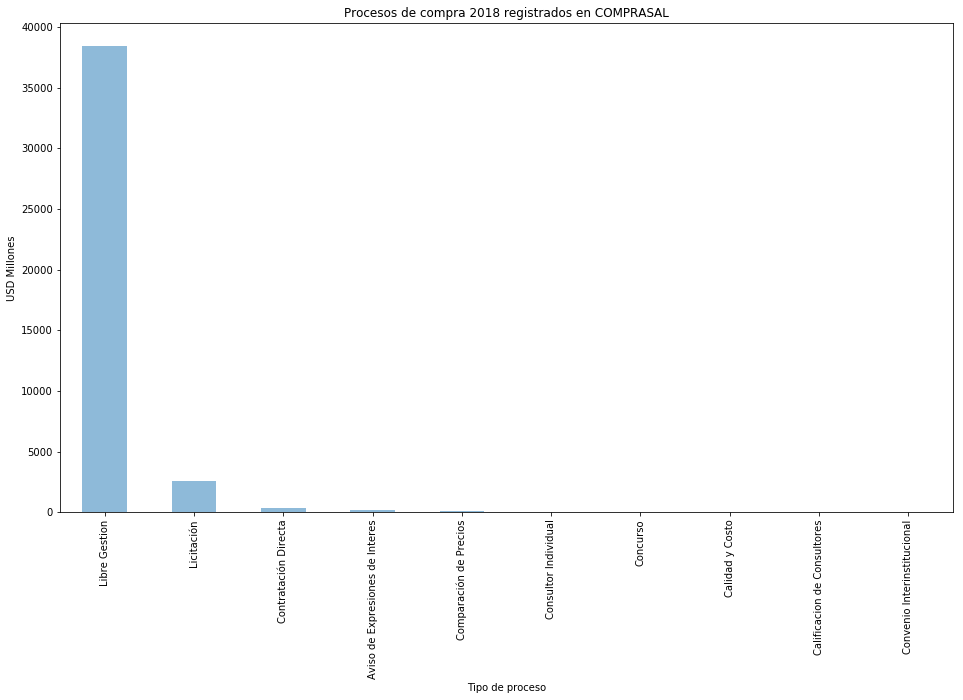

In [162]:
by_process.plot(kind='bar', alpha=0.5, figsize=(16,9))
plt.title('Procesos de compra 2018 registrados en COMPRASAL')
plt.xlabel('Tipo de proceso')
plt.ylabel('USD Millones')

In [163]:
print('Monto negociado: %.1f millones' % by_process.sum())

Monto negociado: 41633.0 millones


In [165]:
# Relative frequency
by_process / by_process.sum()

Tipo de Proc.
Libre Gestion                      0.922465
Licitación                         0.061442
Contratación Directa               0.009103
Aviso de Expresiones de Interes    0.003987
Comparación de Precios             0.001369
Consultor Individual               0.000985
Concurso                           0.000576
Calidad y Costo                    0.000024
Calificacion de Consultores        0.000024
Convenio Interinstitucional        0.000024
Name: Monto, dtype: float64

In [166]:
data['Tipo de Proc.'] = data['Tipo de Proceso'].apply(normalize_name)
awarded = data[data.Resultado.apply(successful_process)]
by_process = awarded.groupby(['Tipo de Proc.']).count().sort_values('Monto', ascending=False)
by_process = by_process[by_process.Monto > 0]['Monto']
by_process

Tipo de Proc.
Libre Gestion                      38405
Licitación                          2558
Contratación Directa                 379
Aviso de Expresiones de Interes      166
Comparación de Precios                57
Consultor Individual                  41
Concurso                              24
Calidad y Costo                        1
Calificacion de Consultores            1
Convenio Interinstitucional            1
Name: Monto, dtype: int64

Text(0, 0.5, 'Frecuencia')

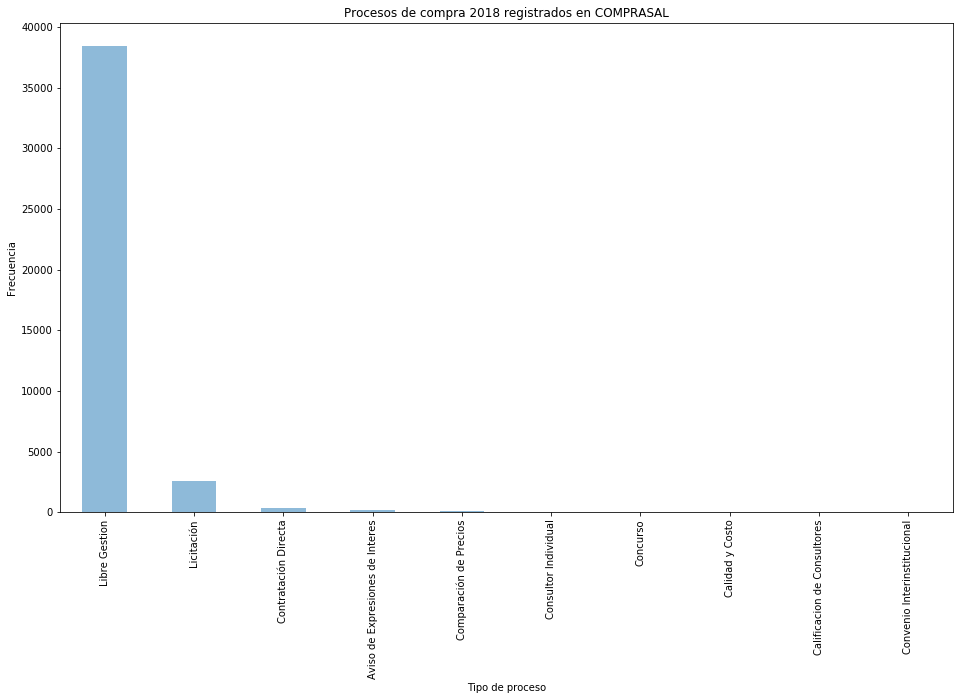

In [167]:
by_process.plot(kind='bar', alpha=0.5, figsize=(16,9))
plt.title('Procesos de compra 2018 registrados en COMPRASAL')
plt.xlabel('Tipo de proceso')
plt.ylabel('Frecuencia')

In [168]:
por_libre_gestion = dict(by_process)['Libre Gestion'] / by_process.sum() * 100
print('Número de procesos: %d' % by_process.sum())
print('Por libre gestión: %.1f' % por_libre_gestion + '%')

Número de procesos: 41633
Por libre gestión: 92.2%


In [169]:
# Relative frequency
by_process / by_process.sum()

Tipo de Proc.
Libre Gestion                      0.922465
Licitación                         0.061442
Contratación Directa               0.009103
Aviso de Expresiones de Interes    0.003987
Comparación de Precios             0.001369
Consultor Individual               0.000985
Concurso                           0.000576
Calidad y Costo                    0.000024
Calificacion de Consultores        0.000024
Convenio Interinstitucional        0.000024
Name: Monto, dtype: float64